Project name & names

### Intro :

### Goal:

### UrbanSound dataset:

For this project we will use a dataset called Urbansound8K. The dataset contains 8732 sound excerpts (<=4s) of urban sounds from 10 classes, which are:

- Air Conditioner
- Car Horn
- Children Playing
- Dog bark
- Drilling
- Engine Idling
- Gun Shot
- Jackhammer
- Siren
- Street Music

The accompanying metadata contains a unique ID for each sound excerpt along with it's given class name.

A sample of this dataset is included with the accompanying git repo and the full dataset can be downloaded from [here](https://urbansounddataset.weebly.com/urbansound8k.html).

**Import Libraries:**

1. IPython.display.Audio
This allows us to play audio directly in the Jupyter Notebook.
2. Librosa
librosa is a Python package for music and audio processing by Brian McFee and will allow us to load audio in our notebook as a numpy array for analysis and manipulation.

In [28]:
#pip install librosa

In [3]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import librosa.display
import IPython.display
import soundfile as sf
%matplotlib inline

### Visual inspection:

We will load a sample from each class and visually inspect the data for any patterns. We will use librosa to load the audio file into an array then librosa.display and matplotlib to display the waveform. 

In [29]:
files = glob.glob('/Users/shaikha/Desktop/final project/UrbanSound8K/sample/*')

In [30]:
samples = [(class_map[label], [f for f in files if f.split('-')[1] == label][0]) 
           for label in class_map.keys()]

In [36]:
samples

[('air_conditioner',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/100852-0-0-0.wav'),
 ('car_horn',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/100648-1-0-0.wav'),
 ('children_playing',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/100263-2-0-117.wav'),
 ('dog_bark',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/100032-3-0-0.wav'),
 ('drilling',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/103199-4-0-0.wav'),
 ('engine_idling',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/102857-5-0-0.wav'),
 ('gun_shot',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/102305-6-0-0.wav'),
 ('jackhammer',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/103074-7-0-0.wav'),
 ('siren',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/102853-8-0-0.wav'),
 ('street_music',
  '/Users/shaikha/Desktop/final project/UrbanSound8K/sample/101848-9-0-0.wav')]

In [37]:
def get_sound_data(path, sr=22050):
    data, fsr = sf.read(path)
    data_22k = librosa.resample(data.T, fsr, sr)
    if len(data_22k.shape) > 1:
        data_22k = np.average(data_22k, axis=0)
    return data_22k, sr

In [38]:
sample_data = [(sample[0], get_sound_data(sample[1])) for sample in samples]

In [39]:
[(sample[0], sample[1][0].shape) for sample in sample_data]

[('air_conditioner', (88200,)),
 ('car_horn', (14300,)),
 ('children_playing', (88200,)),
 ('dog_bark', (7002,)),
 ('drilling', (88200,)),
 ('engine_idling', (88200,)),
 ('gun_shot', (57551,)),
 ('jackhammer', (88200,)),
 ('siren', (88200,)),
 ('street_music', (88200,))]

In [40]:
for data in sample_data:
    print(data[0], ':')
    IPython.display.display(IPython.display.Audio(data=data[1][0], rate=data[1][1]))

air_conditioner :


car_horn :


children_playing :


dog_bark :


drilling :


engine_idling :


gun_shot :


jackhammer :


siren :


street_music :


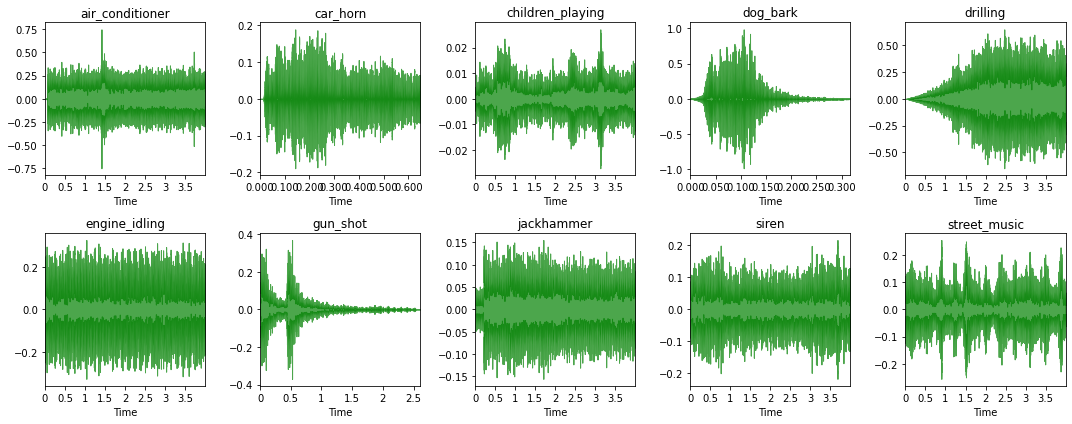

In [42]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    librosa.display.waveplot(item[1][0], sr=item[1][1], color='g', alpha=0.7)
    plt.title(item[0])
    i += 1
plt.tight_layout()


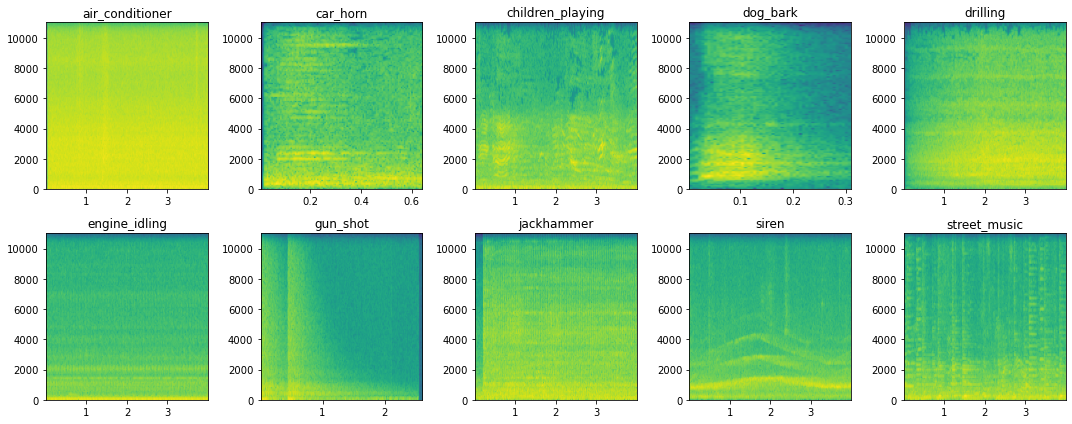

In [43]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    specgram(item[1][0], Fs=item[1][1])
    plt.title(item[0])
    i += 1
plt.tight_layout()

#### Observations :
    
visualizing explain the differences between some of the classes 
The waveforms for reptitive noises such as air conditioner, drilling, motor idle, and jackhammer, in particular, have a similar structure. 
The peak in the dog barking sample is also similar in shape to the peak in the gunshot sample . The car horn is also similar. 
There are also similarities between what the children playing and what is heard on the street.

### Dataset Metadata:
Here we will load the UrbanSound metadata .csv file into a Panda dataframe.

#### Why We Need Metadata ?

- contains meta-data information about every audio file in the dataset
- The accompanying metadata contains a unique ID for each sound excerpt along with it's given class name.that allow to us to acsee each record easir
- finlly we need to collect more features more than metaseta and that will be adress leter on 





In [44]:
metadata = pd.read_csv('/Users/shaikha/Desktop/final project/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class_name
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


**Class distributions:**

In [45]:
print(metadata.class_name.value_counts())

drilling            1000
air_conditioner     1000
engine_idling       1000
jackhammer          1000
dog_bark            1000
street_music        1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class_name, dtype: int64


The Class labels are imbalanced in this example. Regardless of the fact that seven of the ten classes contain exactly 1000 samples, and siren isn't far behind with 929, the other two (car horn and gun shot) have much less samples, with 43 percent and 37 percent, respectively.

### Flods File :

The files are pre-sorted into ten folds (folders named fold1-fold10) to help in the reproduction of and comparison with the automatic classification results reported in the article above.

as we mentions above the metadata will let as to acess each flod so we will iterate through each of the audio sample files and extract all the features that we need and merge it with metadeta, before feed it to any model 